### **ST1/ST1G Assignment 9 (Capstone Programming Project)**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = '/content'

## Step 1: Reading the data Reading the data with python

In [3]:
import pandas as pd
import numpy as np
diamonds = pd.read_csv('diamonds.csv', encoding='latin')
print('Shape befor deleting duplicate values:', diamonds.shape)

# Removing duplicate rows if any
diamonds=diamonds.drop_duplicates()
print('Shape After deleting duplicate values:', diamonds.shape)

diamonds.head(10)

Shape befor deleting duplicate values: (53940, 11)
Shape After deleting duplicate values: (53940, 11)


,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
5,6,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48
6,7,0.24,Very Good,I,VVS1,62.3,57.0,336,3.95,3.98,2.47
7,8,0.26,Very Good,H,SI1,61.9,55.0,337,4.07,4.11,2.53
8,9,0.22,Fair,E,VS2,65.1,61.0,337,3.87,3.78,2.49
9,10,0.23,Very Good,H,VS1,59.4,61.0,338,4.00,4.05,2.39


In [4]:
diamonds.tail(10)


,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
53930,53931,0.71,Premium,E,SI1,60.5,55.0,2756,5.79,5.74,3.49
53931,53932,0.71,Premium,F,SI1,59.8,62.0,2756,5.74,5.73,3.43
53932,53933,0.70,Very Good,E,VS2,60.5,59.0,2757,5.71,5.76,3.47
53933,53934,0.70,Very Good,E,VS2,61.2,59.0,2757,5.69,5.72,3.49
53934,53935,0.72,Premium,D,SI1,62.7,59.0,2757,5.69,5.73,3.58
53935,53936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,53937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,53938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74
53939,53940,0.75,Ideal,D,SI2,62.2,55.0,2757,5.83,5.87,3.64


Key Observations from Step 1 about Data Description:
This file contains 10 rows of data, likely representing individual diamonds with specific characteristics.

There are 11 attributes in the dataset, outlined below:


Unnamed: 0 - The index or identifier for each diamond.

carat - The weight of the diamond in carats.

cut - The quality of the cut, with possible values like Premium, Ideal, Very Good, etc.

color - The color grade of the diamond, with values like E, F, H, etc.

clarity - The clarity grade, representing the visibility of internal inclusions, such as SI1, VS2, etc.

depth - The total depth percentage of the diamond, calculated as

table - The width of the diamond's table expressed as a percentage of its average diameter.

price - The price of the diamond in USD.

x - The length of the diamond in millimeters.

y - The width of the diamond in millimeters.

z - The depth of the diamond in millimeters.

# **Step 2: Problem Statement Definition**

Creating a prediction model to predict the price of diamonds

Target virable: price

 Predators/Features: carat,cut,color,clarity,depth,table,price,x,y,z.

## **Step 3: Choosing the appropriate ML/AI Algorithm for Data Analysis.**

Based on the problem statement we need to create a supervised ML Regression model, as the target variable is Continuous.

## **Step 4: Looking at the class distribution (Target variable distribution to check if the data is balanced or skewed)**

If target variable's distribution is too skewed then the predictive modeling will lead to poor results.

Ideally Bell curve is desirable but slightly positive skew or negative skew is also fine.

When performing Regression algorithm modelling and analysis, we need to make sure the histogram looks like a bell curve or slight skewed version of it.

Otherwise it impacts the Machine Learning algorithms ability to learn all the scenarios from the data.





<Axes: >

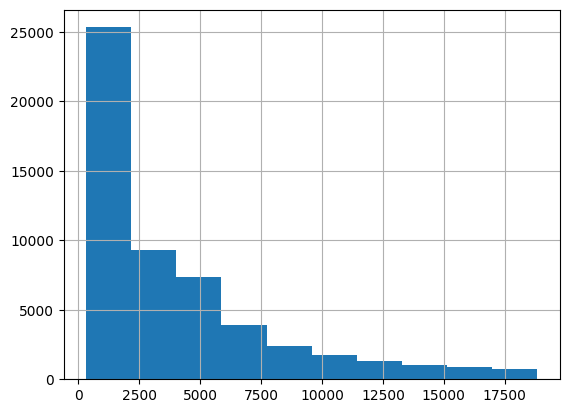

In [5]:
%matplotlib inline
# Creating histogram as the Target variable is Continuous
# This will help us to understand the distribution of the diamonds values
diamonds['price'].hist()

In [6]:
# Looking at HEAD in data
diamonds.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [7]:
# Looking at TAIL in data
diamonds.tail()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
53935,53936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,53937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,53938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74
53939,53940,0.75,Ideal,D,SI2,62.2,55.0,2757,5.83,5.87,3.64


In [8]:
# Looking at INFO in data
diamonds.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


In [9]:
# Looking at DESCRIBE in data
diamonds.describe(include='all')

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940,53940,53940,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
unique,NaN,NaN,5,7,8,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Ideal,G,SI1,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,21551,11292,13065,NaN,NaN,NaN,NaN,NaN,NaN
mean,26970.500000,0.797940,NaN,NaN,NaN,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,15571.281097,0.474011,NaN,NaN,NaN,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,1.000000,0.200000,NaN,NaN,NaN,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,13485.750000,0.400000,NaN,NaN,NaN,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,26970.500000,0.700000,NaN,NaN,NaN,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,40455.250000,1.040000,NaN,NaN,NaN,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000


In [10]:
# Looking at unique in data
diamonds.nunique()

Unnamed: 0    53940
carat           273
cut               5
color             7
clarity           8
depth           184
table           127
price         11602
x               554
y               552
z               375
dtype: int64

In [11]:
# Plotting multiple bar charts at once for categorical variables
# Since there is no default function which can plot bar charts for multiple columns at once
# we are defining our own function for the same

def PlotBarCharts(inpData, colsToPlot):
    %matplotlib inline

    import matplotlib.pyplot as plt

    # Generating multiple subplots
    fig, subPlot=plt.subplots(nrows=1, ncols=len(colsToPlot), figsize=(20,5))
    fig.suptitle('Bar charts of: '+ str(colsToPlot))

    for colName, plotNumber in zip(colsToPlot, range(len(colsToPlot))):
        inpData.groupby(colName).size().plot(kind='bar',ax=subPlot[plotNumber])

## **Step 7: Removing Unwanted columns**
There are no qualitative columns in the data.

Hence no need to remove any column.

## **Step 8: Visual Exploratory Data Analysis**



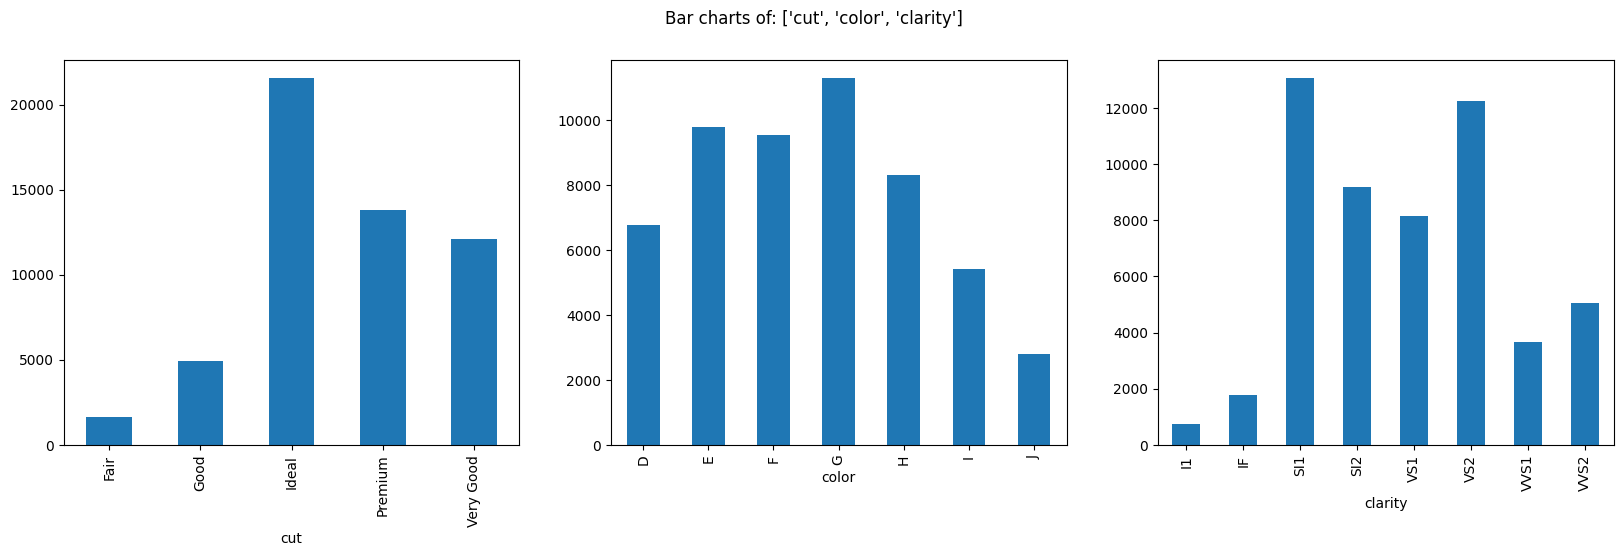

In [12]:
def PlotBarCharts(inpData, colsToPlot):
  %matplotlib inline
  import matplotlib.pyplot as plt
  # Generating multiple subplots
  fig, subPlot=plt.subplots(nrows=1, ncols=len(colsToPlot), figsize=(20,5))
  fig.suptitle('Bar charts of: '+ str(colsToPlot))
  for colName, plotNumber in zip(colsToPlot, range(len(colsToPlot))):
    inpData.groupby(colName).size().plot(kind='bar',ax=subPlot[plotNumber])
#####################################################################
# Calling the function PlotBarCharts() we have created
PlotBarCharts(inpData=diamonds, colsToPlot=['cut','color','clarity'])


Observations from Step 8 - Visual Exploratory Data Analysis (Left for now)

Bar Charts have allowed interpretation on the two data columns

The bar charts represent the frequencies of each category in the Y-axis and the category names in the X-axis.

In the ideal bar chart each category has comparable frequency.

Hence, there are enough rows for each category in the data for the ML/AI regression algorithm to learn.

If there is a column which shows too skewed distribution where there is only one dominant bar and the other categories are present in very low numbers.

These kind of columns may not be very helpful in machine learning model development.

We can confirm this with the correlation analysis step coming up, and take a final call to select or reject the column/data attribute.

In this dataset, it is worth noting that "CHAS" is skewed.
 There is just one bar which is dominating and other one have very less rows.

Such columns may not be correlated with the target variable because there is no information to learn.

The algorithms cannot find any rule like when the value is this then the target variable is that.

## **Step 9: Now Visualize distribution of all the Continuous Predictor variables in the data using histograms**

Based on the Basic Exploratory Data Analysis, there are seven continuous predictor variables "carat", "depth", "table", "price", "x", "y","z".

array([[<Axes: title={'center': 'carat'}>,
        <Axes: title={'center': 'depth'}>,
        <Axes: title={'center': 'table'}>],
       [<Axes: title={'center': 'price'}>, <Axes: title={'center': 'x'}>,
        <Axes: title={'center': 'y'}>],
       [<Axes: title={'center': 'z'}>, <Axes: >, <Axes: >]], dtype=object)

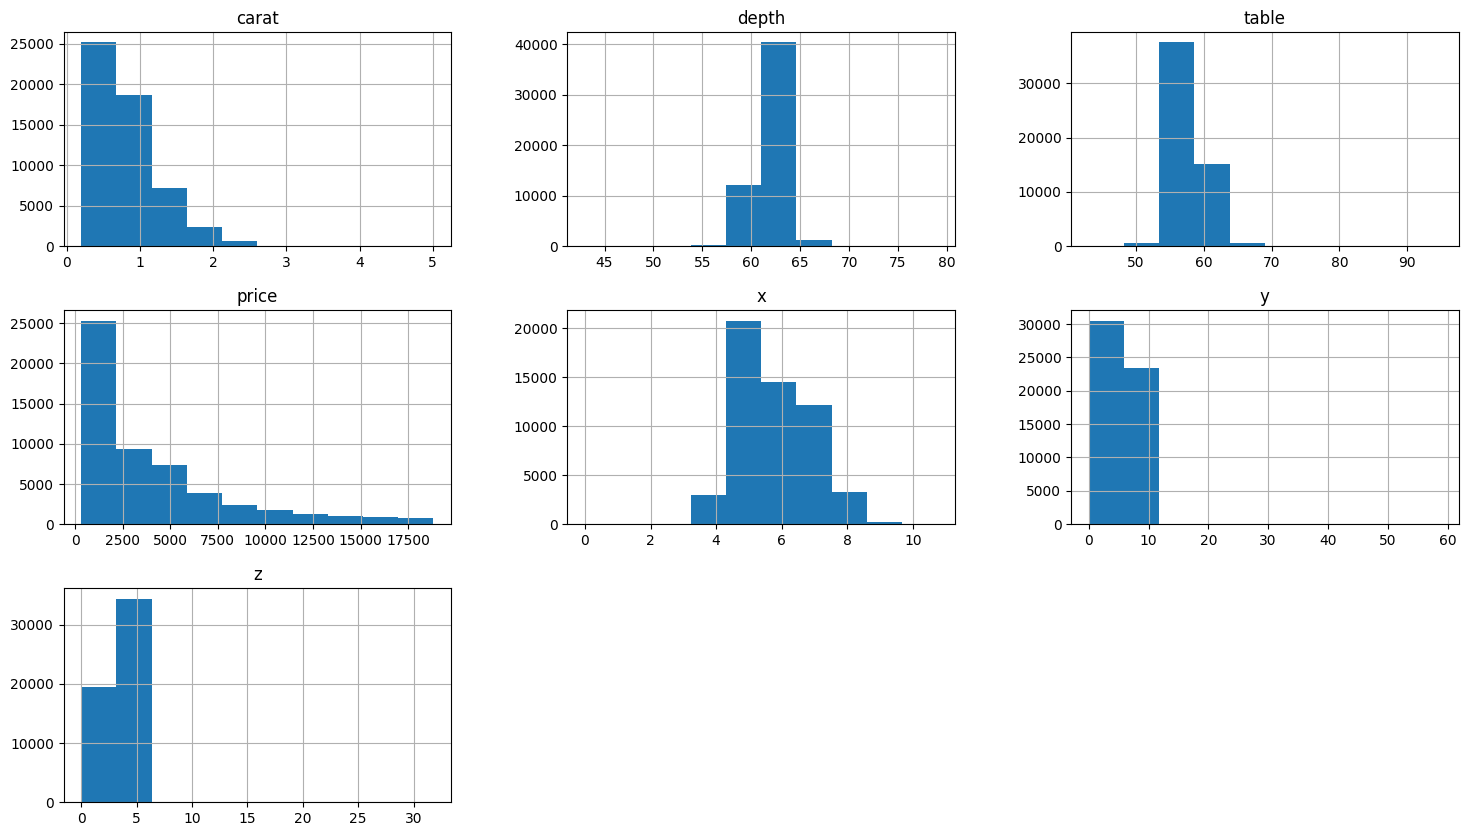

In [13]:
# Plotting histograms of multiple columns together
diamonds.hist(['carat','depth','table','price','x','y','z'], figsize=(18,10))

Observations from Step 9
Histogram Interpretation

Each histograms shows us the data distribution for a single continuous variable.

The X-axis shows the range of values and Y-axis represent the number of values in that range.

For example, in the histogram of open, there are over 40 days that gold price reach in closet to $160.00

Selected Continuous Variables:

carat : Selected. The distribution is good

table : Selected. The distribution is good.

price : Selected. The distribution is good.

x     : Selected. The distrubution is good.

y     : Selected. The distrubution is good.

z     : Selected. The distrubution is good.

depth : Selected. The outliner for 80 are quite low. They needed to be treated as such.


## **Step 10: Outlier Analysis**
Outliers are extreme values in the data which are far away from most of the values.

You can see them as the tails in the histogram.

Outlier must be treated one column/data attribute at a time.

As the treatment will be slightly different for each column

Why I should analyse the outliers?

Outliers bias the building of machine learning models.

As the algorithm tries to fit the extreme value, it goes away from majority of the data.

Outlined below are two options to treat outliers in the data.

Option-1: Delete the outlier Records. Only if there are just few rows lost.

Option-2: Impute the outlier values with a logical business value

Let us find out out the most logical value to be replaced in place of outliers by looking at the histogram.

In [14]:
#Replacing outliers for 'depth'
# Finding nearest values to 70 mark
diamonds['depth'][diamonds['depth']<80].sort_values(ascending=False)

52861    79.0
52860    79.0
41918    78.2
46679    73.6
53540    72.9
         ... 
36503    51.0
16857    50.8
6341     44.0
10377    43.0
4518     43.0
Name: depth, Length: 53940, dtype: float64

Observation: Above result shows the nearest logical value is 79.0, hence, replacing any value above 80 with it.

In [15]:
# Replacing outliers with nearest possibe value
diamonds['depth'][diamonds['depth']>80] = 79

C:\Users\Baoryan\AppData\Local\Temp\ipykernel_35644\3645111844.py:2: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  diamonds['depth'][diamonds['depth']>80] = 79
C:\Users\Baoryan\AppData\Local\Temp\ipykernel_35644\3645111844.py:2: SettingWithC

Step 11:Visualising Data Distribution after outlier removal


array([[<Axes: title={'center': 'depth'}>]], dtype=object)

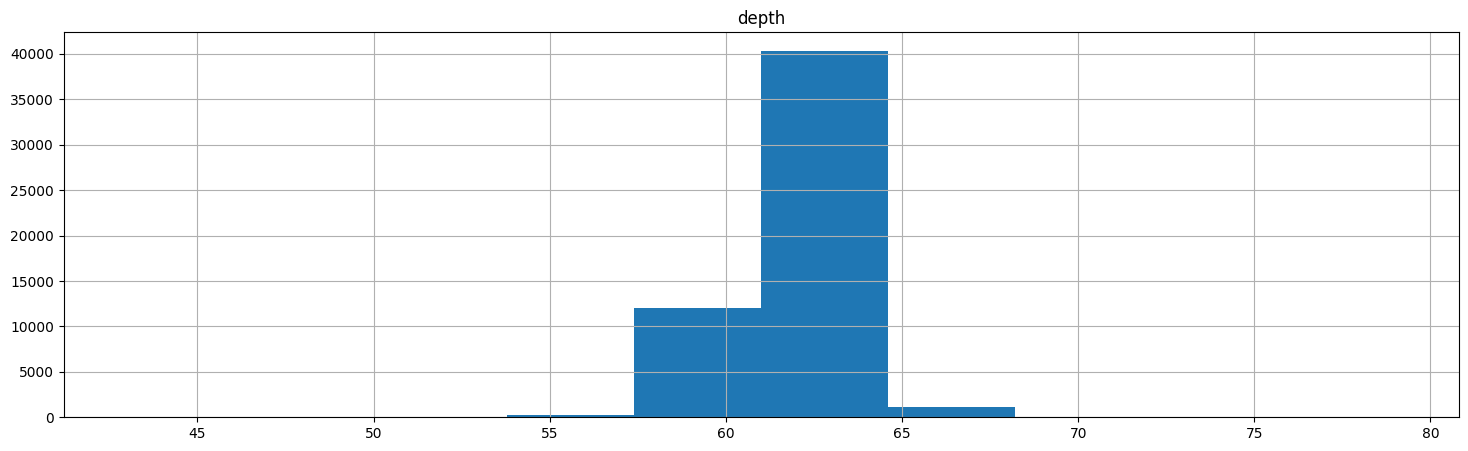

In [16]:
diamonds.hist(['depth'], figsize=(18,5))

## **Step 12: Missing Values Analysis**

Missing values are treated for each column separately.

If a column has more than 30% data missing, then missing value treatment cannot be done.

That column must be rejected because too much information is missing.

Outlined below are some options for treating missing values in data.

Delete the missing value rows if there are only few records

Impute the missing values with MEDIAN value for continuous variables

Impute the missing values with MODE value for categorical variables

Interpolate the values based on nearby values

Interpolate the values based on business logic

In [17]:
# Finding how many missing values are there for each column
diamonds.isnull().sum()

Unnamed: 0    0
carat         0
cut           0
color         0
clarity       0
depth         0
table         0
price         0
x             0
y             0
z             0
dtype: int64

## **Observations from Step 12: Missing Value Analysis**

No missing values in data

So no removal is required

### **Step 13: Feature Selection (Attribute Selection)**

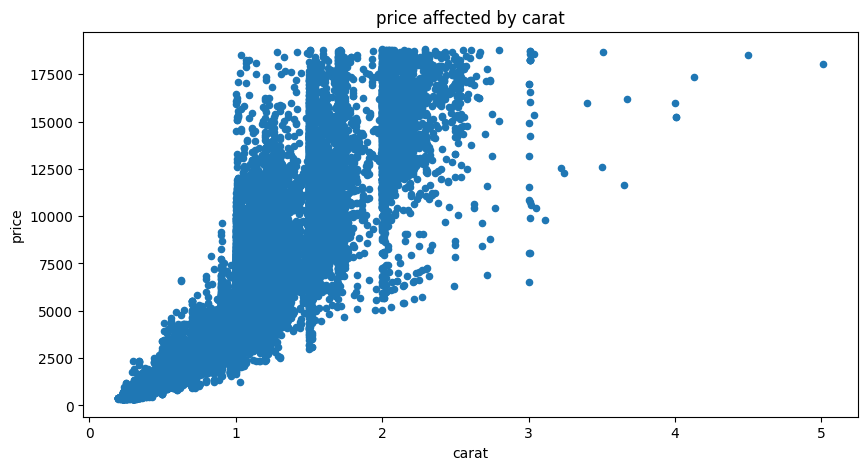

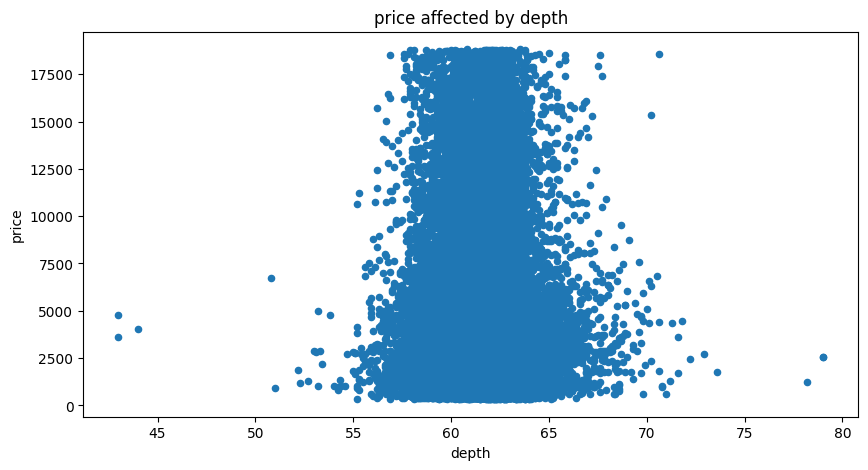

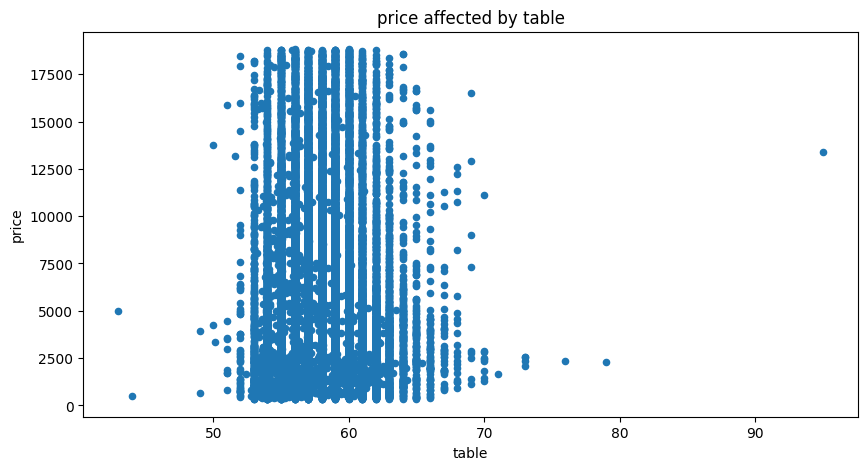

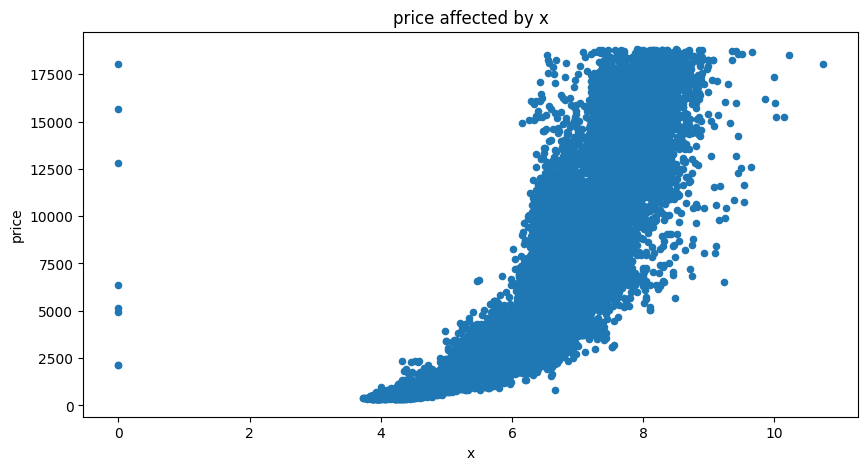

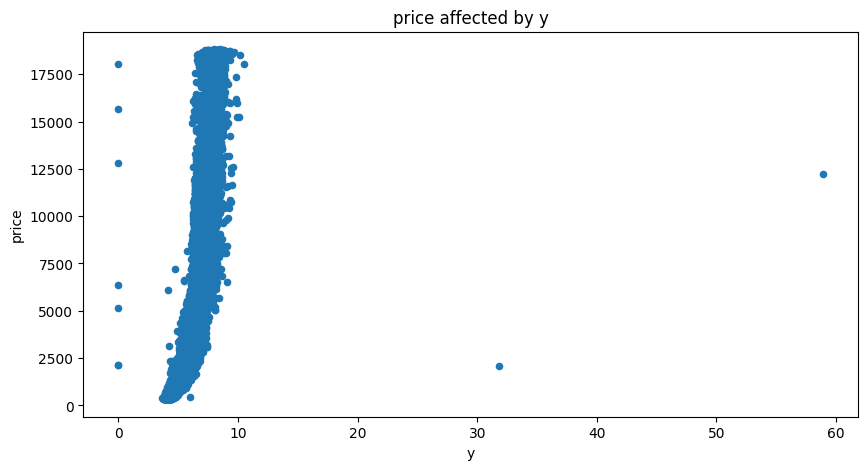

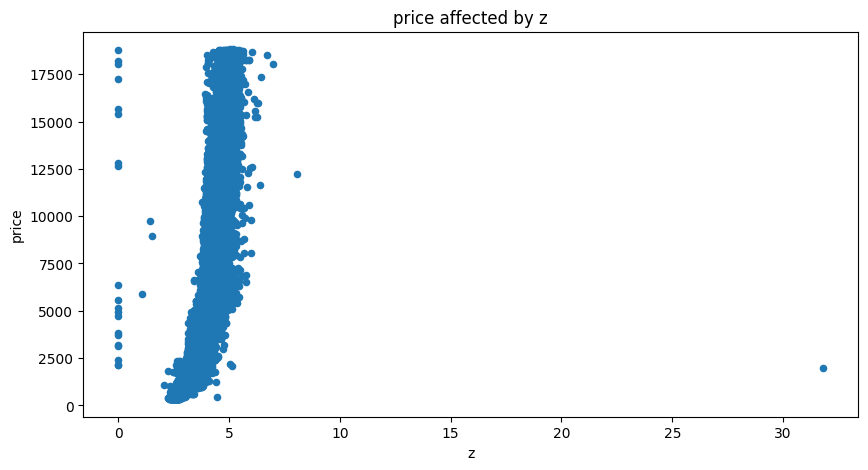

In [18]:
ContinuousCols=['carat','depth', 'table','x','y','z']

# Plotting scatter chart for each predictor vs the target variable
for predictor in ContinuousCols:
    diamonds.plot.scatter(x=predictor, y='price', figsize=(10,5), title="price" + " affected by "+predictor)

## Scatter charts interpretation
* What should you look for in these scatter charts?

* **Trend.** You should try to see if there is a visible trend or not. There could be three scenarios

* **!!Increasing Trend!!**: This means both variables are positively correlated. In simpler terms, they are directly proportional to each other, if one value increases, other also increases. This is good for ML model building!

* **Decreasing Trend:** This means both variables are negatively correlated. In simpler terms, they are inversely proportional to each other, if one value increases, other decreases. This is also good for ML model building!

* **No Trend**: You cannot see any clear increasing or decreasing trend. This means there is no correlation between the variables. Hence that predictor/feature may not be the best one for ML model building.

* Based on this chart we can get a good idea about the predictor, if it will be useful or not. You confirm this by looking at the correlation value in the next step.

## Step 14: Statistical Feature Selection (Continuous Vs Continuous) using Correlation value

* Pearson's correlation coefficient is a powerful metric for doing this.
* It can simply be calculated as the covariance between two features  x and  y
  (numerator) divided by the product of their standard deviations (denominator):

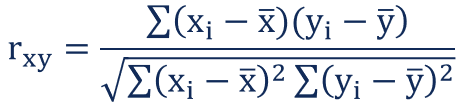

* This value can be calculated only between two numeric columns
Correlation between [-1,0) means inversely proportional, the scatter plot will show a downward trend
* Correlation between (0,1] means directly proportional, the scatter plot will show a upward trend
* Correlation near {0} means No relationship, the scatter plot will show no clear trend.
* If Correlation value between two variables is > 0.5 in magnitude, it indicates good relationship the sign does not matter
* We observe the correlations between Target variable and all other predictor variables(s) to check which columns/features/predictors are actually related to the target variable in question.

In [19]:
# Calculating correlation matrix
ContinuousCols=['carat','depth', 'table','x','y','z','price']

# Creating the correlation matrix
CorrelationData=diamonds[ContinuousCols].corr()
CorrelationData

,carat,depth,table,x,y,z,price
carat,1.000000,0.028224,0.181618,0.975094,0.951722,0.953387,0.921591
depth,0.028224,1.000000,-0.295779,-0.025289,-0.029341,0.094924,-0.010647
table,0.181618,-0.295779,1.000000,0.195344,0.183760,0.150929,0.127134
x,0.975094,-0.025289,0.195344,1.000000,0.974701,0.970772,0.884435
y,0.951722,-0.029341,0.183760,0.974701,1.000000,0.952006,0.865421
z,0.953387,0.094924,0.150929,0.970772,0.952006,1.000000,0.861249
price,0.921591,-0.010647,0.127134,0.884435,0.865421,0.861249,1.000000


In [20]:
# Filtering only those columns where absolute correlation > 0.5 with Target Variable
# reduce the 0.5 threshold if no variable is selected
CorrelationData['price'][abs(CorrelationData['price']) > 0.5 ]

carat    0.921591
x        0.884435
y        0.865421
z        0.861249
price    1.000000
Name: price, dtype: float64

## Observations from Step 14
* Final selected Continuous columns:

* **'carat','depth', 'table','x','y','z','price'**

# Step 15:  Relationship exploration: Categorical Vs Continuous -- Box Plots
* When the target variable is Continuous and the predictor variable is Categorical we analyze the relation using Boxplots,  and
* Measure the strength of relation using Anova test.

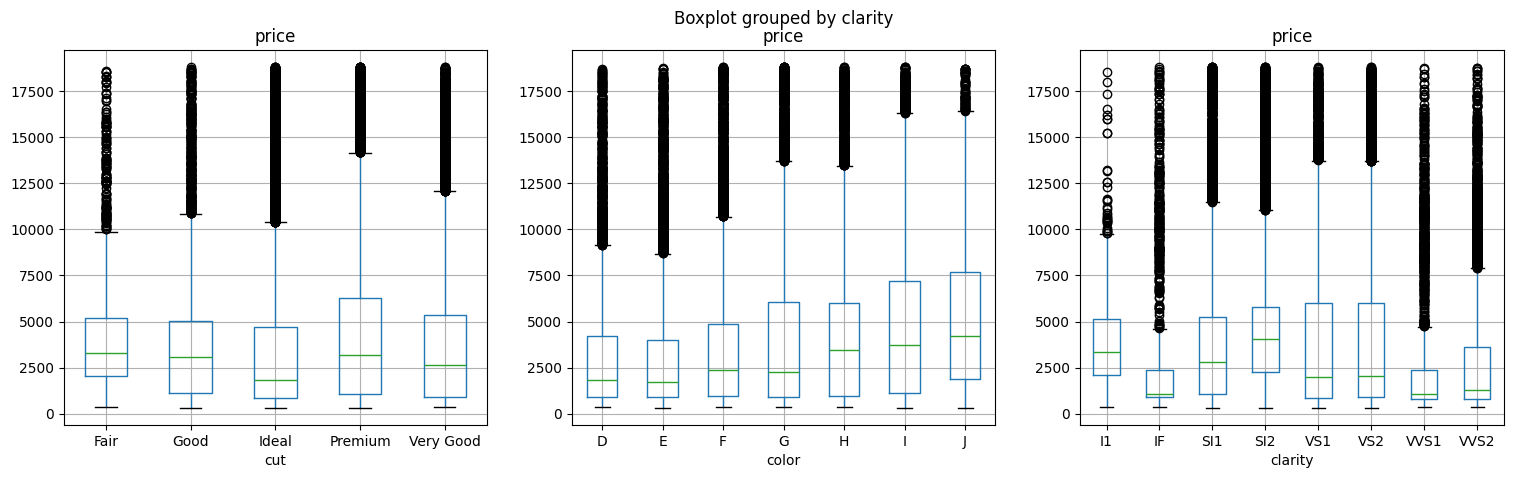

In [21]:
# Box plots for continuous Target Variable "MEDV" and Categorical predictors
CategoricalColsList=['cut', 'color','clarity']

import matplotlib.pyplot as plt
fig, PlotCanvas=plt.subplots(nrows=1, ncols=len(CategoricalColsList), figsize=(18,5))

# Creating box plots for each continuous predictor against the Target Variable "MEDV"
for PredictorCol , i in zip(CategoricalColsList, range(len(CategoricalColsList))):
    diamonds.boxplot(column='price', by=PredictorCol, figsize=(5,5), vert=True, ax=PlotCanvas[i])

##Observations from Step 15: Box-Plots interpretation

* What should you look for in these box plots?

* These plots gives an idea about the data distribution of continuous predictor in the Y-axis for each of the category in the X-Axis.

* If the distribution looks similar for each category(Boxes are in the same line), that means the the continuous variable has NO effect on the target variable. Hence, the variables are not correlated to each other.

* On the other hand if the distribution is different for each category(the boxes are not in same line!). It hints that these variables might be correlated with price.

* For this datadata, both the categorical predictors looks correlated with the Target variable.

We confirm this by looking at the results of ANOVA test below

## Step 16: Statistical Feature Selection (Categorical Vs Continuous) using ANOVA test

* Analysis of variance(ANOVA) is performed to check if there is any relationship between the given continuous and categorical variable

* Assumption(H0) Null Hypothesis: There is NO relation between the given variables (i.e.
* The average(mean) values of the numeric Target variable is same for all the groups in the categorical Predictor variable)
* ANOVA Test result: Probability of H0 (Null Hypothesis being true

In [22]:
# Defining a function to find the statistical relationship with all the categorical variables
def FunctionAnova(inpData, TargetVariable, CategoricalPredictorList):
    from scipy.stats import f_oneway

    # Creating an empty list of final selected predictors
    SelectedPredictors=[]

    print('##### ANOVA Results ##### \n')
    for predictor in CategoricalPredictorList:
        CategoryGroupLists=inpData.groupby(predictor)[TargetVariable].apply(list)
        AnovaResults = f_oneway(*CategoryGroupLists)

        # If the ANOVA P-Value is <0.05, that means we reject H0
        if (AnovaResults[1] < 0.05):
            print(predictor, 'is correlated with', TargetVariable, '| P-Value:', AnovaResults[1])
            SelectedPredictors.append(predictor)
        else:
            print(predictor, 'is NOT correlated with', TargetVariable, '| P-Value:', AnovaResults[1])

    return(SelectedPredictors)

In [23]:
#Calling the function to check which categorical variables are correlated with target
CategoricalPredictorList=['cut', 'color','clarity']
FunctionAnova(inpData=diamonds,
              TargetVariable='price',
              CategoricalPredictorList=CategoricalPredictorList)

##### ANOVA Results ##### 

cut is correlated with price | P-Value: 8.42830730759452e-150
color is correlated with price | P-Value: 0.0
clarity is correlated with price | P-Value: 1.9190895e-316


['cut', 'color', 'clarity']

##Observations from Step 16
* The results of ANOVA confirm our visual analysis using box plots above.

* All categorical variables are correlated with the Target variable.
* This is something you can guess by looking at the box plots!

* Final selected Categorical columns:

'cut', 'color', 'clarity'


## Selecting final Predictors/Features for building Machine Learning/AI model.
* Based on the extensive tests with exploratory data analysis, we can select the final features/predictors/columns for machine learning model building as:
* **'carat','depth', 'table','x','y','z','cut','color','clarity'**


In [24]:
SelectedColumns=['carat','depth', 'table','x','y','z']

# Selecting final columns
DataForML=diamonds[SelectedColumns]
DataForML.head()

,carat,depth,table,x,y,z
0,0.23,61.5,55.0,3.95,3.98,2.43
1,0.21,59.8,61.0,3.89,3.84,2.31
2,0.23,56.9,65.0,4.05,4.07,2.31
3,0.29,62.4,58.0,4.20,4.23,2.63
4,0.31,63.3,58.0,4.34,4.35,2.75


In [25]:
# Saving this final data subset for reference during deployment
DataForML.to_pickle('DataForML.pkl')

## Step 17: Data Pre-processing for Machine Learning Model Building or Model Development
* List of steps that needs to be performed on predictor variables before data can be used for machine learning

* Converting each Ordinal Categorical columns to numeric
* Converting Binary nominal Categorical columns to numeric using 1/0 mapping
* Converting all other nominal categorical columns to numeric using pd.get_dummies()
* Data Transformation (Optional): Standardization/Normalization/log/sqrt. Important if you are using distance based algorithms like KNN, or Neural Networks
* Converting the ordinal variable to numeric - In this data there is no Ordinal categorical variable.
* Converting the binary nominal variable to numeric using 1/0 mapping: There is no binary nominal variable in string format in this data


## Converting the nominal variable to numeric using get_dummies()

In [26]:
# Treating all the nominal variables at once using dummy variables
DataForML_Numeric=pd.get_dummies(DataForML)

# Adding Target Variable to the data
DataForML_Numeric['price']=diamonds['price']

# Printing sample rows
DataForML_Numeric.head()

,carat,depth,table,x,y,z,price
0,0.23,61.5,55.0,3.95,3.98,2.43,326
1,0.21,59.8,61.0,3.89,3.84,2.31,326
2,0.23,56.9,65.0,4.05,4.07,2.31,327
3,0.29,62.4,58.0,4.20,4.23,2.63,334
4,0.31,63.3,58.0,4.34,4.35,2.75,335


## Step 18: Machine Learning Model Development:
* Splitting the data into Training and Testing sample
* We dont use the full data for creating the model (training data).
* Some data is randomly selected and kept aside for checking how good the model is.
* This is known as Testing Data and the remaining data is called Training data on which the model is built.
* Typically 70% of data is used as Training data and the rest 30% is used as Tesing data.


In [27]:
# Printing all the column names for our reference
DataForML_Numeric.columns

Index(['carat', 'depth', 'table', 'x', 'y', 'z', 'price'], dtype='object')

In [28]:
#Separate Target Variable and Predictor Variables
TargetVariable='price'
Predictors=['carat','depth', 'table','x','y','z']

X=DataForML_Numeric[Predictors].values
y=DataForML_Numeric[TargetVariable].values

# Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=428)

## Step 19: Standardization/Normalization of data
* You can choose not to run this step if you want to compare the resultant accuracy of this transformation with the accuracy of raw data (Optional Step)

* However, if you are using KNN or Neural Networks, then this step becomes necessary.

In [29]:
### Standardization of data ###
from sklearn.preprocessing import StandardScaler, MinMaxScaler
# Choose either standardization or Normalization
# On this data Min Max Normalization produced better results

# Choose between standardization and MinMAx normalization
#PredictorScaler=StandardScaler()
PredictorScaler=MinMaxScaler()

# Storing the fit object for later reference
PredictorScalerFit=PredictorScaler.fit(X)

# Generating the standardized values of X
X=PredictorScalerFit.transform(X)

# Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [30]:
# Sanity check for the sampled data
# For checking the X and y shape of train and actual test
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(37758, 6)
(37758,)
(16182, 6)
(16182,)


## Step 20: Multiple Linear Regression Algorithm For ML/AI model building


In [31]:
#Multiple Linear Regression
from sklearn.linear_model import LinearRegression
RegModel = LinearRegression()

# Printing all the parameters of Linear regression
print(RegModel)

# Creating the model on Training Data
LREG=RegModel.fit(X_train,y_train)
prediction=LREG.predict(X_test)

from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, LREG.predict(X_train)))

###########################################################################
print('\n##### Model Validation and Accuracy Calculations ##########')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

# Printing sample prediction values
print(TestingDataResults.head())

# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(
  TestingDataResults['price']-TestingDataResults['Predictedprice']))/TestingDataResults['price'])

MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)

# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    #print('#'*70,'Accuracy:', 100-MAPE)
    return(100-MAPE)

# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

LinearRegression()
R2 Value: 0.8590151413333513

##### Model Validation and Accuracy Calculations ##########
      carat     depth     table         x         y         z  price  \
0  0.008316  0.530556  0.250000  0.369646  0.067912  0.077673    559   
1  0.079002  0.472222  0.269231  0.506518  0.092020  0.102516   2201   
2  0.041580  0.530556  0.230769  0.443203  0.080475  0.092767   1238   
3  0.047817  0.494444  0.269231  0.458101  0.083022  0.093711   1304   
4  0.280665  0.536111  0.230769  0.692737  0.125127  0.144969   6901   

   Predictedprice  
0           192.0  
1          2364.0  
2          1054.0  
3          1232.0  
4         10025.0  
Mean Accuracy on test data: 71.52678734895264
Median Accuracy on test data: 77.97753716871364

Accuracy values for 10-fold Cross Validation:
 [70.84432213 71.29981866 77.52422653 77.2960614  75.85989545 62.48497141
 61.99412577 64.28421054 72.78473638 67.90715466]

Final Average Accuracy of the model: 70.23


## **Decision Tree Regressor**


DecisionTreeRegressor(criterion='friedman_mse', max_depth=5)
R2 Value: 0.8806608129085106

##### Model Validation and Accuracy Calculations ##########
      carat     depth     table         x         y         z  price  \
0  0.008316  0.530556  0.250000  0.369646  0.067912  0.077673    559   
1  0.079002  0.472222  0.269231  0.506518  0.092020  0.102516   2201   
2  0.041580  0.530556  0.230769  0.443203  0.080475  0.092767   1238   
3  0.047817  0.494444  0.269231  0.458101  0.083022  0.093711   1304   
4  0.280665  0.536111  0.230769  0.692737  0.125127  0.144969   6901   

   Predictedprice  
0           577.0  
1          1969.0  
2           916.0  
3          1042.0  
4         10678.0  
Mean Accuracy on test data: 79.07574827430571
Median Accuracy on test data: 83.5685938222537

Accuracy values for 10-fold Cross Validation:
 [69.45725658 66.27891678 75.50517378 68.787473   72.41112674 77.68408592
 76.86354004 64.35844964 79.44761092 72.43938395]

Final Average Accuracy of the m

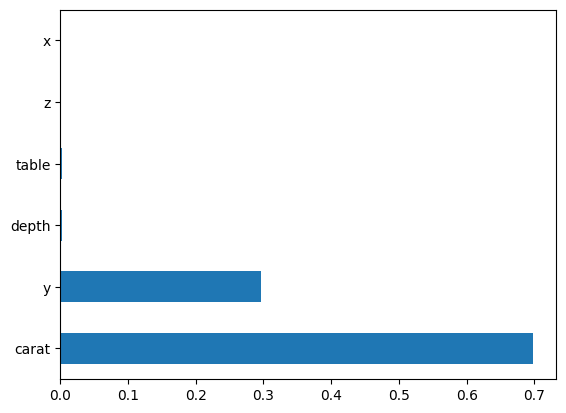

In [32]:
# Decision Trees (Multiple if-else statements!)
from sklearn.tree import DecisionTreeRegressor
RegModel = DecisionTreeRegressor(max_depth=5,criterion='friedman_mse')
# Good Range of Max_depth = 2 to 20

# Printing all the parameters of Decision Tree
print(RegModel)

# Creating the model on Training Data
DT=RegModel.fit(X_train,y_train)
prediction=DT.predict(X_test)

from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, DT.predict(X_train)))

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(DT.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

###########################################################################
print('\n##### Model Validation and Accuracy Calculations ##########')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

# Printing sample prediction values
print(TestingDataResults.head())

# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(
  TestingDataResults['price']-TestingDataResults['Predictedprice']))/TestingDataResults['price'])

MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)

# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    #print('#'*70,'Accuracy:', 100-MAPE)
    return(100-MAPE)

# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

In [33]:
# Load libraries
from IPython.display import Image
from sklearn import tree
import pydotplus

# Remove the class_names parameter as it's not relevant for regression
dot_data = tree.export_graphviz(RegModel, out_file=None,
                                feature_names=Predictors)

# printing the rules
#print(dot_data)

# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)

# Show graph
Image(graph.create_png(), width=2000,height=2000)
# Double click on the graph to zoom in

InvocationException: GraphViz's executables not found

# Random Forest Regressor

RandomForestRegressor(criterion='friedman_mse', max_depth=4, n_estimators=400)
R2 Value: 0.8791101864572921

##### Model Validation and Accuracy Calculations ##########
      carat     depth     table         x         y         z  price  \
0  0.008316  0.530556  0.250000  0.369646  0.067912  0.077673    559   
1  0.079002  0.472222  0.269231  0.506518  0.092020  0.102516   2201   
2  0.041580  0.530556  0.230769  0.443203  0.080475  0.092767   1238   
3  0.047817  0.494444  0.269231  0.458101  0.083022  0.093711   1304   
4  0.280665  0.536111  0.230769  0.692737  0.125127  0.144969   6901   

   Predictedprice  
0           699.0  
1          1840.0  
2           965.0  
3           965.0  
4         10595.0  
Mean Accuracy on test data: 78.33668053582477
Median Accuracy on test data: 82.81990521327015

Accuracy values for 10-fold Cross Validation:
 [68.96250444 65.35705159 75.56059977 68.75298527 72.36873354 79.15551464
 74.51553482 63.50900677 78.1253764  71.31543382]

Final Averag

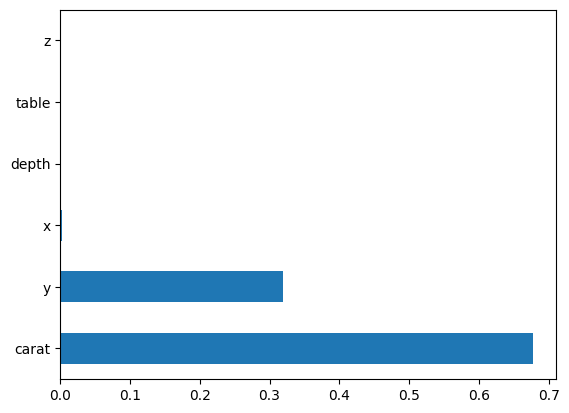

In [34]:
# Random Forest (Bagging of multiple Decision Trees)
from sklearn.ensemble import RandomForestRegressor
RegModel = RandomForestRegressor(max_depth=4, n_estimators=400,criterion='friedman_mse')
# Good range for max_depth: 2-10 and n_estimators: 100-1000

# Printing all the parameters of Random Forest
print(RegModel)

# Creating the model on Training Data
RF=RegModel.fit(X_train,y_train)
prediction=RF.predict(X_test)

from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, RF.predict(X_train)))

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(RF.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

###########################################################################
print('\n##### Model Validation and Accuracy Calculations ##########')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

# Printing sample prediction values
print(TestingDataResults.head())

# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(
  TestingDataResults['price']-TestingDataResults['Predictedprice']))/TestingDataResults['price'])

MAPE=np.mean(TestingDataResults['APE'])
OpenMAPE=np.median(TestingDataResults['APE'])

Accuracy =100 - MAPE
OpenAccuracy=100- OpenMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', OpenAccuracy)


# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    #print('#'*70,'Accuracy:', 100-MAPE)
    return(100-MAPE)

# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

**Step 21: AdaBoost Algorithm For ML/AI model building**

In [35]:
# Adaboost (Boosting of multiple Decision Trees)
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
# Choosing Decision Tree with 6 level as the weak learner
DTR=DecisionTreeRegressor(max_depth=3)
RegModel = AdaBoostRegressor(n_estimators=100, base_estimator=DTR ,learning_rate=0.04)
# Printing all the parameters of Adaboost
print(RegModel)
# Creating the model on Training Data
AB=RegModel.fit(X_train,y_train)
prediction=AB.predict(X_test)
from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, AB.predict(X_train)))
# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(AB.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')
###########################################################################
print('\n##### Model Validation and Accuracy Calculations ##########')
# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)
# Printing sample prediction values
print(TestingDataResults.head())
# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(
TestingDataResults['price']-TestingDataResults['Predictedprice']))/TestingDataResults['price'])
MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])
Accuracy =100 - MAPE



TypeError: AdaBoostRegressor.__init__() got an unexpected keyword argument 'base_estimator'

In [36]:
# Adaboost (Boosting of multiple Decision Trees)


MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)

# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred): # Removed extra indent here
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    #print('#'*70,'Accuracy:', 100-MAPE)
    return(100-MAPE)

# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

# ... (rest of your code)
# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score
# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))


Mean Accuracy on test data: 78.33668053582477
Median Accuracy on test data: 83.5685938222537

Accuracy values for 10-fold Cross Validation:
 [68.92946506 65.36434555 75.53226532 68.77472002 72.42948084 79.15279885
 74.54370706 63.58057599 78.03445803 71.35789859]

Final Average Accuracy of the model: 71.77


**XGBoost Regressor**


---




XGBRegressor(base_score=None, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=2, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=None,
             num_parallel_tree=None, objective='reg:linear', ...)


C:\Users\Baoryan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\xgboost\core.py:158: UserWarning: [13:51:54] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\objective\regression_obj.cu:227: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


R2 Value: 0.893243670463562

##### Model Validation and Accuracy Calculations ##########
      carat     depth     table         x         y         z  price  \
0  0.008316  0.530556  0.250000  0.369646  0.067912  0.077673    559   
1  0.079002  0.472222  0.269231  0.506518  0.092020  0.102516   2201   
2  0.041580  0.530556  0.230769  0.443203  0.080475  0.092767   1238   
3  0.047817  0.494444  0.269231  0.458101  0.083022  0.093711   1304   
4  0.280665  0.536111  0.230769  0.692737  0.125127  0.144969   6901   

   Predictedprice  
0           565.0  
1          1844.0  
2          1011.0  
3          1093.0  
4         10946.0  
Mean Accuracy on test data: 79.85532459992896
Open Accuracy on test data: 82.81990521327015


C:\Users\Baoryan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\xgboost\core.py:158: UserWarning: [13:51:54] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\objective\regression_obj.cu:227: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
C:\Users\Baoryan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\xgboost\core.py:158: UserWarning: [13:51:55] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\objective\regression_obj.cu:227: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
C:\Users\Baoryan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\P


Accuracy values for 10-fold Cross Validation:
 [72.9921954  67.83439707 75.41134985 70.81302525 73.22447859 78.5928503
 79.99184629 67.7118576  80.18802298 74.66213913]

Final Average Accuracy of the model: 74.14


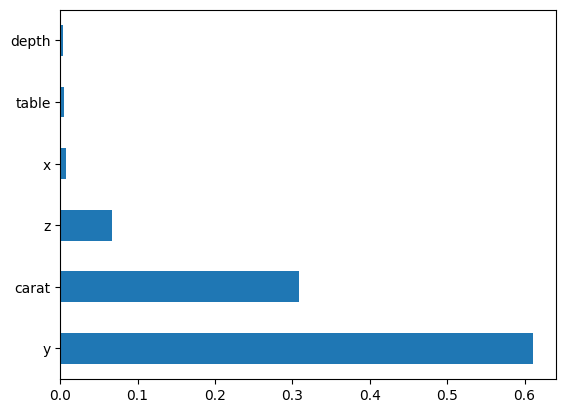

In [37]:
# Xtreme Gradient Boosting (XGBoost)
from xgboost import XGBRegressor
RegModel=XGBRegressor(max_depth=2,
learning_rate=0.1,
n_estimators=1000,
objective='reg:linear',
booster='gbtree')
# Printing all the parameters of XGBoost
print(RegModel)
# Creating the model on Training Data
XGB=RegModel.fit(X_train,y_train)
prediction=XGB.predict(X_test)
from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, XGB.predict(X_train)))
# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(XGB.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')
###########################################################################
print('\n##### Model Validation and Accuracy Calculations ##########')
# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)
# Printing sample prediction values
print(TestingDataResults.head())
# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(
TestingDataResults['price']-TestingDataResults['Predictedprice']))/TestingDataResults['price'])
MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])
Accuracy =100 - MAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Open Accuracy on test data:', OpenAccuracy)


# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    #print('#'*70,'Accuracy:', 100-MAPE)
    return(100-MAPE)

# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))



**Plotting a single Decision tree out of XGBoost**


ExecutableNotFound: failed to execute WindowsPath('dot'), make sure the Graphviz executables are on your systems' PATH

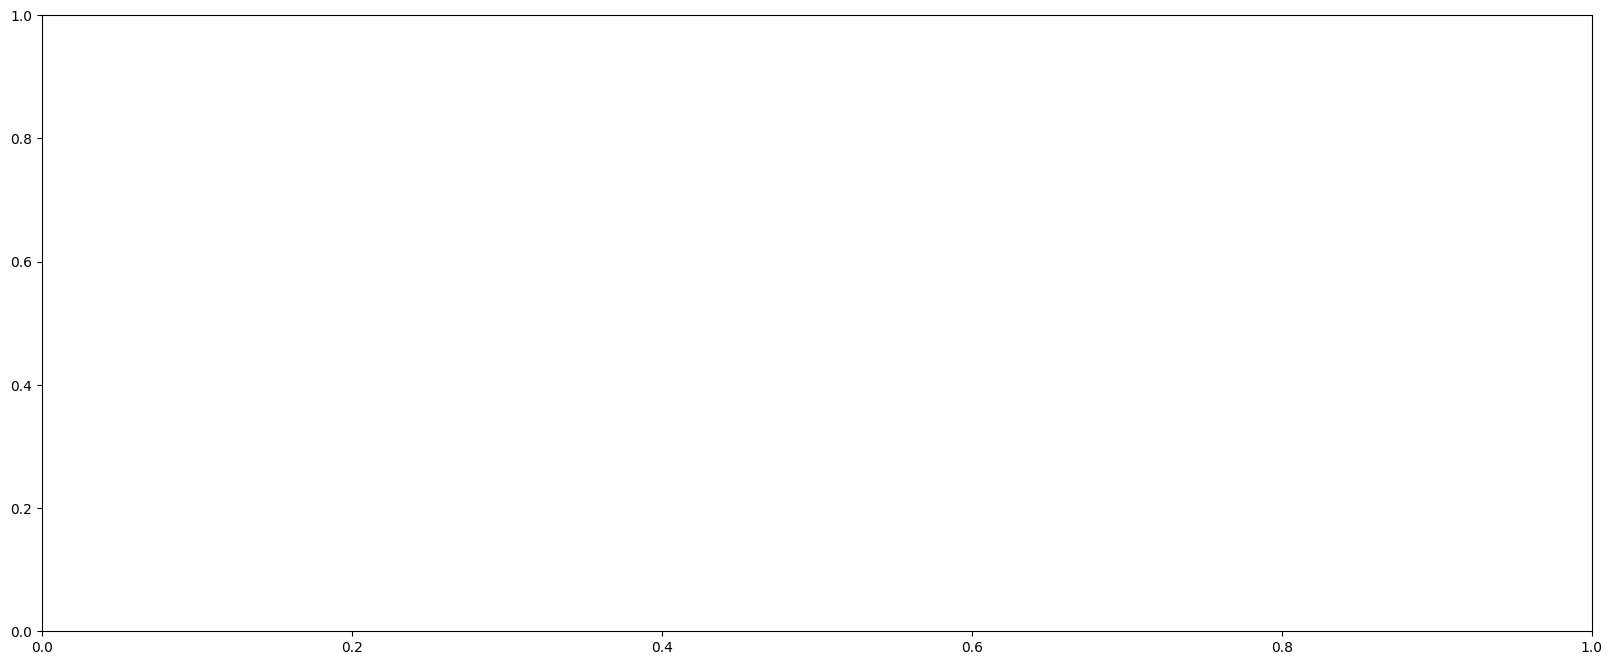

In [38]:
#Plotting a single Decision tree out of XGBoost
from xgboost import plot_tree
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(20, 8))
plot_tree(XGB, num_trees=10, ax=ax)


# **K-Nearest Neighbor(KNN)**


In [39]:
#kNN
# K-Nearest Neighbor(KNN)
from sklearn.neighbors import KNeighborsRegressor
RegModel = KNeighborsRegressor(n_neighbors=3)
# Printing all the parameters of KNN
print(RegModel)
# Creating the model on Training Data
KNN=RegModel.fit(X_train,y_train)
prediction=KNN.predict(X_test)
from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, KNN.predict(X_train)))
# Plotting the feature importance for Top 10 most important columns
# The variable importance chart is not available for KNN
###########################################################################
print('\n##### Model Validation and Accuracy Calculations ##########')
# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)
# Printing sample prediction values
print(TestingDataResults.head())
# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(
TestingDataResults['price']-TestingDataResults['Predictedprice']))/TestingDataResults['price'])
MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])
Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)
# Defining a custom function to calculate accuracy

# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig)) # Indent this line
    #print('#'*70,'Accuracy:', 100-MAPE)
    return(100-MAPE)
# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)
# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score
# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))


KNeighborsRegressor(n_neighbors=3)
R2 Value: 0.9279700181170605

##### Model Validation and Accuracy Calculations ##########
      carat     depth     table         x         y         z  price  \
0  0.008316  0.530556  0.250000  0.369646  0.067912  0.077673    559   
1  0.079002  0.472222  0.269231  0.506518  0.092020  0.102516   2201   
2  0.041580  0.530556  0.230769  0.443203  0.080475  0.092767   1238   
3  0.047817  0.494444  0.269231  0.458101  0.083022  0.093711   1304   
4  0.280665  0.536111  0.230769  0.692737  0.125127  0.144969   6901   

   Predictedprice  
0           615.0  
1          1716.0  
2          1045.0  
3          1044.0  
4          8431.0  
Mean Accuracy on test data: 77.95838624416572
Median Accuracy on test data: 82.97872340425532

Accuracy values for 10-fold Cross Validation:
 [69.80948533 66.18359038 69.944871   67.20983409 70.64364941 76.31026257
 77.72898051 66.67135403 74.02770291 72.04243623]

Final Average Accuracy of the model: 71.06


## **Support Vector Machine (SVM) Regressor**


In [40]:
# Support Vector Machines(SVM)
from sklearn import svm
RegModel = svm.SVR(C=50, kernel='rbf', gamma=0.01)
# Printing all the parameters
print(RegModel)
# Creating the model on Training Data
SVM=RegModel.fit(X_train,y_train)
prediction=SVM.predict(X_test)
from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, SVM.predict(X_train)))
# Plotting the feature importance for Top 10 most important columns
# The built in attribute SVM.coef_ works only for linear kernel
%matplotlib inline
#feature_importances = pd.Series(SVM.coef_[0], index=Predictors)
#feature_importances.nlargest(10).plot(kind='barh')
###########################################################################
print('\n##### Model Validation and Accuracy Calculations ##########')
# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)
# Printing sample prediction values
print(TestingDataResults.head())
# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(
TestingDataResults['price']-TestingDataResults['Predictedprice']))/TestingDataResults['price'])
MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])
Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)


SVR(C=50, gamma=0.01)
R2 Value: 0.13323417122893244

##### Model Validation and Accuracy Calculations ##########
      carat     depth     table         x         y         z  price  \
0  0.008316  0.530556  0.250000  0.369646  0.067912  0.077673    559   
1  0.079002  0.472222  0.269231  0.506518  0.092020  0.102516   2201   
2  0.041580  0.530556  0.230769  0.443203  0.080475  0.092767   1238   
3  0.047817  0.494444  0.269231  0.458101  0.083022  0.093711   1304   
4  0.280665  0.536111  0.230769  0.692737  0.125127  0.144969   6901   

   Predictedprice  
0          1578.0  
1          2258.0  
2          1925.0  
3          2001.0  
4          3482.0  
Mean Accuracy on test data: 23.424935147316404
Median Accuracy on test data: 41.50816026165168


# Step 21: Model Deployment
* Deployment of the Model - Based on the above trials we select that algorithm which produces the best average accuracy.

* In this case, multiple algorithms have produced similar kind of average accuracy. Hence, we can choose any one of them.

* I am choosing XGboost as the final model it has the highest accuracy!

* In order to deploy the model we follow steps outlined next.

* Train/Build the model again using 100% data available

* Save the model as a serialized file which can be stored anywhere.

* Create a python function which gets integrated with front-end Viewer(GUI/ Website etc.) to take all the inputs and returns the prediction

* Choosing only the most important variables

* Its beneficial to keep lesser number of predictors for the model while deploying it in production.

* The lesser predictors you keep, the better it is, because the model will be less dependent on predictor columns/features, hence, more stable.

* This is important specially when the data is high dimensional(too many predictor columns/features).

* For this dataset, the most important predictor variables are 'LSTAT', 'RM', and 'PTRATIO'. As these are consistently on top of the variable importance chart for every algorithm. Hence choosing these as final set of predictor variables will result in better house price prediction platform/system.

In [41]:
# Separate Target Variable and Predictor Variables
TargetVariable='price'

# Selecting the final set of predictors for the deployment
# Based on the variable importance charts of multiple algorithms above
Predictors=['carat','depth', 'table','x','y','z']

X=DataForML_Numeric[Predictors].values
y=DataForML_Numeric[TargetVariable].values

### Sandardization of data ###
from sklearn.preprocessing import StandardScaler, MinMaxScaler
# Choose either standardization or Normalization
# On this data Min Max Normalization produced better results

# Choose between standardization and MinMAx normalization
#PredictorScaler=StandardScaler()
PredictorScaler=MinMaxScaler()

# Storing the fit object for later reference
PredictorScalerFit=PredictorScaler.fit(X)

# Generating the standardized values of X
X=PredictorScalerFit.transform(X)

print(X.shape)
print(y.shape)

(53940, 6)
(53940,)


**# Step 22: Retraining the final model using 100% data**

In [42]:
# Training the model on 100% Data available
Final_XGB_Model=RegModel.fit(X,y)

**# Step 23: Save the model as a serialized file which can be stored anywhere**

In [43]:
import pickle
import os

# Saving the Python objects as serialized files can be done using pickle library
# Here let us save the Final model
with open('Final_XGB_Model.pkl', 'wb') as fileWriteStream:
    pickle.dump(Final_XGB_Model, fileWriteStream)
    # Don't forget to close the filestream!
    fileWriteStream.close()

print('pickle file of Predictive Model is saved at Location:',os.getcwd())

pickle file of Predictive Model is saved at Location: c:\Users\Baoryan\Downloads\quoc


**# Step 24: Create a python function**

In [44]:
from re import IGNORECASE
import os
# This Function can be called from any from any front end tool/website

def FunctionPredictResult(InputData):
    import pandas as pd
    Num_Inputs=InputData.shape[0]

    # Making sure the input data has same columns as it was used for training the model
    # Also, if standardization/normalization was done, then same must be done for new input

    # Appending the new data with the Training data
    # Check if the file exists before attempting to read it.
    if os.path.exists('DataForML.pkl'):
        DataForML=pd.read_pickle('DataForML.pkl')
        InputData = pd.concat([InputData, DataForML], ignore_index=True)
    else:
        # Handle the case where the file is not found,
        # e.g., by raising an error or using a default dataset.
        raise FileNotFoundError("The file 'DataForML.pkl' was not found. Please make sure it exists in the current directory.")

    # Generating dummy variables for rest of the nominal variables
    InputData=pd.get_dummies(InputData)

    # Maintaining the same order of columns as it was during the model training
    Predictors=['carat','depth', 'table','x','y','z']

    # Generating the input values to the model
    X=InputData[Predictors].values[0:Num_Inputs]

    # Generating the standardized values of X since it was done while model training also
    # Make sure that 'PredictorScalerFit' is defined and accessible in this function.
    X=PredictorScalerFit.transform(X)

    # Loading the Function from pickle file
    import pickle
    with open('Final_XGB_Model.pkl', 'rb') as fileReadStream:
        PredictionModel=pickle.load(fileReadStream)
        # Don't forget to close the filestream!
        fileReadStream.close()

    # Genrating Predictions
    Prediction=PredictionModel.predict(X)
    PredictionResult=pd.DataFrame(Prediction, columns=['Prediction'])
    return(PredictionResult)

**# Step 25: Calling the function for some new data**

In [45]:
# Calling the function for some new data
NewSampleData=pd.DataFrame(data=[[0.23,61.5,55,3.95,3.98,2.43],[0.21,59.8,61,3.89,3.84,2.31]],columns=['carat','depth','table','x','y','z'])

print(NewSampleData)

# Calling the Function for prediction
FunctionPredictResult(InputData=NewSampleData)

   carat  depth  table     x     y     z
0   0.23   61.5     55  3.95  3.98  2.43
1   0.21   59.8     61  3.89  3.84  2.31


,Prediction
0,1212.405292
1,1200.150285


# Conclusion
* The Function FunctionPredictResult() can be used to produce the predictions for one or more new cases at a time.
* Hence, it can be scheduled using a batch job or cron job to run every night and generate predictions for all the house price tasks  in the platform /system.

# Deploying a predictive model as an API
* Django and flask are two popular ways to deploy predictive models as a web service
* You can call your predictive models using a URL from any front end like tableau, java or angular js


# Deploying the model with few parameters
# Function for predictions API

In [46]:
# Creating the function which can take inputs and return prediction
def FunctionGeneratePrediction(inp_carat,inp_depth,inp_table,inp_x, inp_y, inp_z): # Changed argument name here

    # Creating a data frame for the model input
    SampleInputData=pd.DataFrame(
     data=[[inp_carat,inp_depth,inp_table,inp_x, inp_y, inp_z]],
     columns=['carat','depth', 'table','x','y','z'])

    # Calling the function defined above using the input parameters
    Predictions=FunctionPredictResult(InputData= SampleInputData)

    # Returning the predictions
    return(Predictions.to_json())

# Function call
FunctionGeneratePrediction( inp_carat=0.23,inp_depth=61.5,inp_table=55,inp_x=3.95, inp_y=3.98, inp_z=2.43) # Argument name changed to match

'{"Prediction":{"0":1212.4052916339}}'

# Web Deployment using Flask Library/Package
# Installing the flask library required to create the API


In [ ]:
!pip install flask

# Creating Flask API



In [47]:
from flask import Flask, request, jsonify
import pickle
import pandas as pd
import numpy

In [48]:
app = Flask(__name__)

@app.route('/prediction_api', methods=["GET"])
def prediction_api():
    try:
        # Getting the paramters from API call
        carat_value = float(request.args.get('carat'))
        depth_value = float(request.args.get('depth'))
        table_value = float(request.args.get('table'))
        x_value = float(request.args.get('x'))
        y_value = float(request.args.get('y'))
        z_value = float(request.args.get('z'))


        # Calling the funtion to get predictions
        prediction_from_api=FunctionGeneratePrediction(
                                                       inp_carat,
                                                       inp_depth,
                                                       inp_table,
                                                       inp_x,
                                                       inp_y,
                                                       inp_z
                                                )

        return (prediction_from_api)

    except Exception as e:
        return('Something is not right!:'+str(e))

### Starting the API engine

In [ ]:
import os
if __name__ =="__main__":

    # Hosting the API in localhost
    app.run(host='127.0.0.1', port=9000, threaded=True, debug=True, use_reloader=False)
    # Interrupt kernel to stop the API

 * Serving Flask app '__main__'
 * Debug mode: on


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:9000
INFO:werkzeug:Press CTRL+C to quit


In [50]:
import tkinter as tk
from tkinter import ttk, messagebox
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
import os

class DiamondsPricePredictionApp:
    def __init__(self, master):
        self.master = master
        self.master.title('Diamonds Price Prediction')

        file_path = 'diamonds.csv'
        if not os.path.exists(file_path):
            messagebox.showerror("Error", f"File '{file_path}' not found.")
            return

        self.data = pd.read_csv(file_path)
        
        # Drop the unnamed index column if it exists
        if 'Unnamed: 0' in self.data.columns:
            self.data = self.data.drop(columns=['Unnamed: 0'])

        self.features = ['carat', 'depth', 'table', 'x', 'y', 'z', 'cut', 'color', 'clarity']
        self.inputs = {}

        # Convert categorical features to numeric using get_dummies
        self.X = pd.get_dummies(self.data.drop('price', axis=1), drop_first=True)
        self.y = self.data['price']

        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(self.X, self.y, test_size=0.2, random_state=42)

        self.model = XGBRegressor()
        self.model.fit(self.X_train, self.y_train)

        self.create_widgets()

    def create_widgets(self):
        for i, feature in enumerate(self.features):
            label = tk.Label(self.master, text=f'{feature.capitalize()}:')
            label.grid(row=i, column=0, sticky=tk.W, pady=2)

            if feature in ['carat', 'depth', 'table', 'x', 'y', 'z']:
                entry = tk.Entry(self.master)
                entry.grid(row=i, column=1, pady=2)
                self.inputs[feature] = entry
            elif feature == 'cut':
                cut_options = ['Fair', 'Good', 'Very Good', 'Premium', 'Ideal']
                cut_combobox = ttk.Combobox(self.master, values=cut_options)
                cut_combobox.grid(row=i, column=1, pady=2)
                self.inputs[feature] = cut_combobox
            elif feature == 'color':
                color_options = ['D', 'E', 'F', 'G', 'H', 'I', 'J']
                color_combobox = ttk.Combobox(self.master, values=color_options)
                color_combobox.grid(row=i, column=1, pady=2)
                self.inputs[feature] = color_combobox
            elif feature == 'clarity':
                clarity_options = ['IF', 'VVS1', 'VVS2', 'VS1', 'VS2', 'SI1', 'SI2']
                clarity_combobox = ttk.Combobox(self.master, values=clarity_options)
                clarity_combobox.grid(row=i, column=1, pady=2)
                self.inputs[feature] = clarity_combobox

        predict_button = tk.Button(self.master, text='Submit', command=self.predict_price)
        predict_button.grid(row=len(self.features), column=1, pady=10)

    def predict_price(self):
        # Prepare inputs for prediction
        input_data = {}
        for feature in self.features:
            value = self.inputs[feature].get()
            if feature in ['carat', 'depth', 'table', 'x', 'y', 'z']:
                input_data[feature] = [float(value)]
            else:
                for category in self.X.columns:
                    if category.startswith(feature + '_'):
                        input_data[category] = [1 if category.endswith(value) else 0]

        # Convert input data to DataFrame
        input_df = pd.DataFrame(input_data)

        # Ensure all columns are present
        for column in self.X.columns:
            if column not in input_df.columns:
                input_df[column] = 0

        # Order columns as in training data
        input_df = input_df[self.X.columns]

        # Predict price
        try:
            price = self.model.predict(input_df)
            messagebox.showinfo('Predicted Price', f'The predicted diamond price is ${price[0]:.2f}')
        except Exception as e:
            messagebox.showerror("Error", str(e))

if __name__ == '__main__':
    root = tk.Tk()
    app = DiamondsPricePredictionApp(root)
    root.mainloop()
